**importing important libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import string
import re
import matplotlib.pyplot as plt

In [ ]:
#linking to the driver
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Loading and preparind data (from kaggle)**


In [ ]:
# Getting the api josn file to download the data from kaggle (competition authorization)

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  

kaggle.json


In [ ]:
#downloading data
!kaggle datasets download -d kazanova/sentiment140

 94% 76.0M/80.9M [00:00<00:00, 141MB/s]
100% 80.9M/80.9M [00:00<00:00, 130MB/s]


In [ ]:
#unzipping data 
!unzip -qq /content/sentiment140.zip

In [ ]:
#reading it from csv file 
data = pd.read_csv('training.1600000.processed.noemoticon.csv',  encoding='latin-1')

In [ ]:
#naming data colums(because it is not named )
data.columns =  ['sentiment', 'id', 'date', 'query', 'user_name', 'tweet']

In [ ]:
data.head()

,sentiment,id,date,query,user_name,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#dropping unneccecary columes
data= data.drop(['id','date','query','user_name'],axis=1  )

In [ ]:
data

,sentiment,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
data.info

<bound method DataFrame.info of          sentiment                                              tweet
0                0  is upset that he can't update his Facebook by ...
1                0  @Kenichan I dived many times for the ball. Man...
2                0    my whole body feels itchy and like its on fire 
3                0  @nationwideclass no, it's not behaving at all....
4                0                      @Kwesidei not the whole crew 
...            ...                                                ...
1599994          4  Just woke up. Having no school is the best fee...
1599995          4  TheWDB.com - Very cool to hear old Walt interv...
1599996          4  Are you ready for your MoJo Makeover? Ask me f...
1599997          4  Happy 38th Birthday to my boo of alll time!!! ...
1599998          4  happy #charitytuesday @theNSPCC @SparksCharity...

[1599999 rows x 2 columns]>

In [ ]:
#mapping sentiments labels (0,1) to (nigative and positive)
label_to_sentiment = {0:"negative", 4:"positive"}
def mapper(label) :
  snetiment = label_to_sentiment [label]
  return snetiment
data.sentiment = data.sentiment.apply(lambda x: mapper(x))

<BarContainer object of 2 artists>

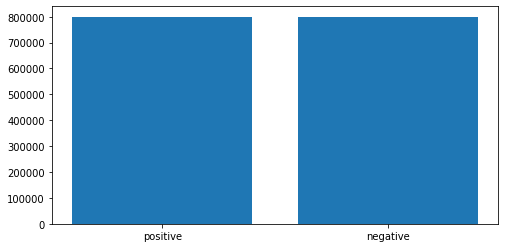

In [ ]:
#making sure that data is balanced
distribution = data.sentiment.value_counts ()
plt.figure(figsize=(8,4))
plt.bar(distribution.index, distribution.values)

#**Text for Sentiment Analysis Pre-processing**

In [ ]:
# Import nltk package and download the stopwords
import nltk 
nltk.download('stopwords')
# We filter out the english language stopwrds
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
#to get rid of steems (er,ing,ed,....)
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

In [ ]:
#removing the non-alphabetic characters, we can use regex expressions.leave [from A to Z and from a to z and all numbers]
import re
text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

In [ ]:
#put all this toghther in one function 
def clean_tweets(text, stem=False):
  # Text passed to the regex equatio
  text = re.sub(text_cleaning_regex, ' ', str(text).lower()).strip()
  # Empty list created to store final tokens
  tokens = []
  for token in text.split():
    # check if the token is a stop word or not
    if token not in stop_words:
      if stem:
        # Paased to the snowball stemmer
        tokens.append(stemmer.stem(token))
      else:
        # A
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
data.tweet = data.tweet.apply (lambda x : clean_tweets(x))

In [ ]:
#data cleaned
data.tweet 

0          upset update facebook texting might cry result...
1          kenichan dived many times ball managed save 50...
2                           whole body feels itchy like fire
3                           nationwideclass behaving mad see
4                                        kwesidei whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995    thewdb com cool hear old walt interviews http ...
1599996                      ready mojo makeover ask details
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: tweet, Length: 1599999, dtype: object

In [ ]:
#splitting data using sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2,random_state=16)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1279999
Test Data size 320000


In [ ]:
test_data

,sentiment,tweet
969293,positive,need stop eating many feasts
1077099,positive,joegerstandt nice better nice
1374744,positive,abi tothemoon get 100 followers day using www ...
1256206,positive,going austin weeks get shop check ut dallas re...
1535422,positive,fighting tenacious jet lag happy continent peo...
...,...,...
980519,positive,aaa hell yeah song reminds blades glory gotta ...
400648,negative,hahaha think funny everyone hates kelsee britn...
106168,negative,sitting 2 best friends katie kristen bored
493702,negative,im hungry idears wat eat


#**Tokenization & Label Encoding**

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [ ]:
#tokenization
tokenizer.fit_on_texts(train_data.tweet)
word_index = tokenizer.word_index
print(word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 565903


In [ ]:
#padding input data (x) to be in same size
from keras.preprocessing.sequence import pad_sequences
# The tokens are converted into sequences and then passed to the pad_sequences() function
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),maxlen = 30)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),maxlen = 30)

In [ ]:
x_train

array([[     0,      0,      0, ...,      0,  68478,    851],
       [     0,      0,      0, ...,     11,   1109,    664],
       [     0,      0,      0, ..., 188742,    510,    187],
       ...,
       [     0,      0,      0, ...,    121,   1493,    294],
       [     0,      0,      0, ...,     78,    273,    615],
       [     0,      0,      0, ...,     66,  76815,   3020]], dtype=int32)

In [ ]:
#label encoding
labels = ['Negative', 'Positive']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())
y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

#**GloVe Word Embeddings**

In [ ]:
#downloading gloVe a pretrained word embedding model
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2022-05-14 05:06:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-14 05:06:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-14 05:06:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embeddings_index = {}
# opening the downloaded glove embeddings file
f = open('/content/glove.6B.300d.txt')
for line in f:
    # For each line file, the words are split and stored in a list
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
#map those vocab(resulted from tokenization) indices with the glove representations
# creating an matrix with zeroes of shape vocab x embedding dimension
embedding_matrix = np.zeros((vocab_size, 300))
# Iterate through word, index in the dictionary
for word, i in word_index.items():
    # extract the corresponding vector for the vocab indice of same word
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Storing it in a matrix
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,300,weights=[embedding_matrix],
                                          input_length=30,trainable=False)


#**Bulding Model Architecture** 

In [ ]:
# Import various layers needed for the architecture from keras
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
# The Input layer 
sequence_input = Input(shape=(30,), dtype='int32')
# Inputs passed to the embedding layer
embedding_sequences = embedding_layer(sequence_input)
# dropout and conv layer 
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
# Passed on to the LSTM layer
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# Passed on to activation layer to get final output
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/sentiment analysis (1)/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,min_lr = 0.01, monitor = 'val_loss',verbose = 1)

#**Model Training and Results**

In [ ]:
#start training
training = model.fit(x_train, y_train, batch_size=1024, epochs=7,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau,model_checkpoint_callback])

Epoch 1/7
1250/1250 [==============================] - 1405s 1s/step - loss: 0.5188 - accuracy: 0.7396 - val_loss: 0.4835 - val_accuracy: 0.7649 - lr: 0.0010
Epoch 2/7
1250/1250 [==============================] - 1399s 1s/step - loss: 0.4873 - accuracy: 0.7625 - val_loss: 0.4740 - val_accuracy: 0.7723 - lr: 0.0010
Epoch 3/7
1250/1250 [==============================] - 1412s 1s/step - loss: 0.4766 - accuracy: 0.7696 - val_loss: 0.4690 - val_accuracy: 0.7739 - lr: 0.0010
Epoch 4/7
1250/1250 [==============================] - 1419s 1s/step - loss: 0.4708 - accuracy: 0.7734 - val_loss: 0.4657 - val_accuracy: 0.7769 - lr: 0.0010
Epoch 5/7
1250/1250 [==============================] - 1400s 1s/step - loss: 0.4661 - accuracy: 0.7761 - val_loss: 0.4623 - val_accuracy: 0.7779 - lr: 0.0010
Epoch 6/7
1250/1250 [==============================] - 1398s 1s/step - loss: 0.4631 - accuracy: 0.7781 - val_loss: 0.4612 - val_accuracy: 0.7792 - lr: 0.0010
Epoch 7/7
1250/1250 [==============================]

#**loading checkpoints**

In [ ]:
#saving  last checkpoints 
model.save_weights('/content/drive/MyDrive/ColabNotebooks')

In [ ]:
#loading checkpoints 
checkpoint_dir = '/content/drive/MyDrive/ColabNotebooks/sentimentanalysis'
model.load_weights(checkpoint_dir)

#**Evaluation of the Sentiment Analysis Model**

In [ ]:
#getting scores and convert it to nigative or positive values
def predict_tweet_sentiment(score):
    return "positive" if score>0.5 else "negative"
scores = model.predict(x_test, verbose=1, batch_size=10000)
model_predictions = [predict_tweet_sentiment(score) for score in scores]

32/32 [==============================] - 70s 2s/step


In [ ]:
#getting accuracey (fast way )
from sklearn import metrics
print(metrics.accuracy_score(list(test_data.sentiment), (model_predictions)))


0.779721875


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
 # y_pred = model.predict(x_test)
  y_pred = scores
# Print the evaluation metrics for the dataset.
  print(classification_report(list(test_data.sentiment), model_predictions))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(list(test_data.sentiment), model_predictions)
  categories = ['negative','positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

    negative       0.78      0.78      0.78    159951
    positive       0.78      0.78      0.78    160049

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



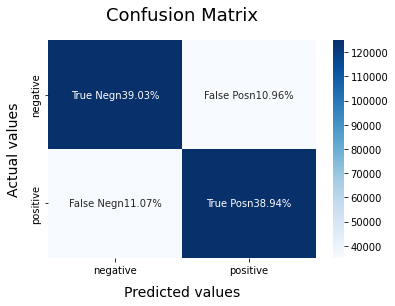

In [ ]:
model_Evaluate(model)